In [1]:
import pandas as pd

df = pd.read_csv("../data/OGNT_processed.csv")
df.head()

,Unnamed: 0,book,chapter,verse,word,lemma,trans,author
0,0,mt,1,1,Βιβλος,βίβλος,book,matthew
1,1,mt,1,1,γενεσεως,γένεσις,origin,matthew
2,2,mt,1,1,Ιησου,Ἰησοῦς,Jesus/Joshua,matthew
3,3,mt,1,1,Χριστου,Χριστός,Christ,matthew
4,4,mt,1,1,υιου,υἱός,son,matthew


# Authors

In [20]:
from cng_distance import compute_ngram_frequencies
import numpy as np

freqs = compute_ngram_frequencies(df, "author", n=3)
list(freqs["matthew"].items())[:4]

[('βίβλος γένεσις Ἰησοῦς', 5.4513737461840385e-05),
 ('γένεσις Ἰησοῦς Χριστός', 5.4513737461840385e-05),
 ('Ἰησοῦς Χριστός υἱός', 5.4513737461840385e-05),
 ('Χριστός υἱός Δαυείδ, Δαυίδ, Δαβίδ', 5.4513737461840385e-05)]

In [3]:
from cng_distance import calculate_distances

distances = calculate_distances(freqs)

print(distances)
unknow_author = {k: v for k, v in distances.items() if "unknown" in k}
print(unknow_author)
unknown_value = min(unknow_author.values())
unknown_value_author = {k: v for k, v in unknow_author.items() if v == unknown_value}
print(F"Unkown autor with min distance: {unknown_value} is {unknown_value_author}")


{('matthew', 'mark'): 503.5780732330826, ('matthew', 'luke'): 642.1033857556614, ('matthew', 'john'): 879.2251254771598, ('matthew', 'paul'): 1182.319070557914, ('matthew', 'unknown'): 1329.6319145330888, ('matthew', 'james'): 1508.5281419798775, ('matthew', 'peter'): 1510.0873504327856, ('matthew', 'jude'): 1589.5855830563166, ('mark', 'luke'): 653.0860610389499, ('mark', 'john'): 835.6009865829682, ('mark', 'paul'): 1244.7154776601083, ('mark', 'unknown'): 1339.173211708747, ('mark', 'james'): 1521.2014195868694, ('mark', 'peter'): 1526.8474249069131, ('mark', 'jude'): 1589.7071883806252, ('luke', 'john'): 773.8729935257462, ('luke', 'paul'): 940.2534571857055, ('luke', 'unknown'): 1207.7296283408123, ('luke', 'james'): 1476.8005481092605, ('luke', 'peter'): 1476.1264556914407, ('luke', 'jude'): 1582.9621056154367, ('john', 'paul'): 1010.1959841210396, ('john', 'unknown'): 1256.9770212973115, ('john', 'james'): 1483.7066313688013, ('john', 'peter'): 1481.0166951315675, ('john', 'jude

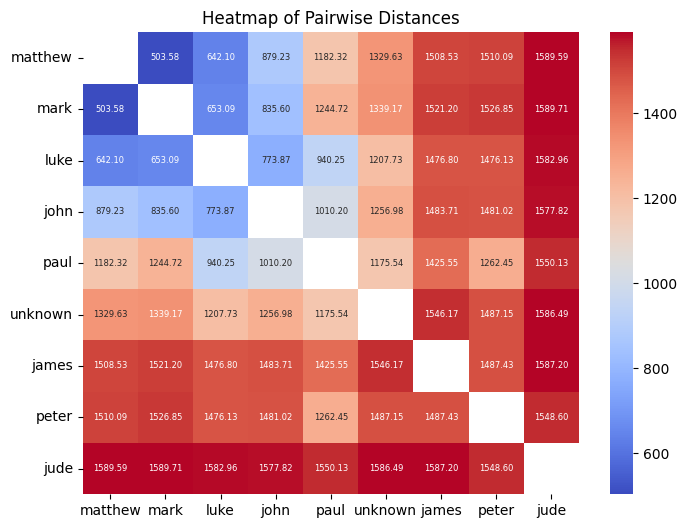

In [4]:
from visualise import show_distance_heatmap

show_distance_heatmap(distances, docs=list(freqs.keys()))

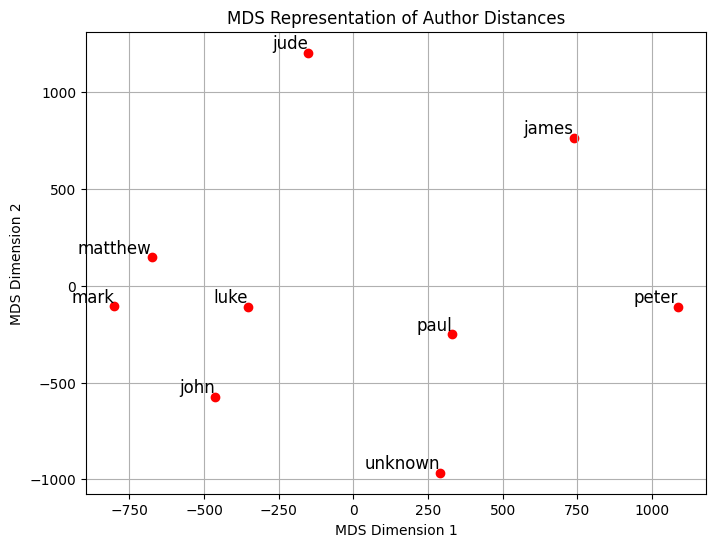

In [5]:
from visualise import show_author_mds_embedding

show_author_mds_embedding(distances, authors=list(freqs.keys()))

# Books

In [21]:
from cng_distance import compute_ngram_frequencies

freqs = compute_ngram_frequencies(df, "book", n=3)
list(freqs["mt"].items())[:4]

[('βίβλος γένεσις Ἰησοῦς', 5.4513737461840385e-05),
 ('γένεσις Ἰησοῦς Χριστός', 5.4513737461840385e-05),
 ('Ἰησοῦς Χριστός υἱός', 5.4513737461840385e-05),
 ('Χριστός υἱός Δαυείδ, Δαυίδ, Δαβίδ', 5.4513737461840385e-05)]

In [24]:
from cng_distance import calculate_distances

distances = calculate_distances(freqs)

print(list(distances.items())[:8])

[(('mt', 'mk'), 503.5780732330826), (('mt', 'lk'), 550.8068306730501), (('mt', 'j'), 889.1512942241203), (('mt', 'acts'), 963.097653615132), (('mt', 'rom'), 1306.1328008700605), (('mt', '1kor'), 1367.6562028383466), (('mt', '2kor'), 1432.9115894143094), (('mt', 'gal'), 1521.6558631803357)]


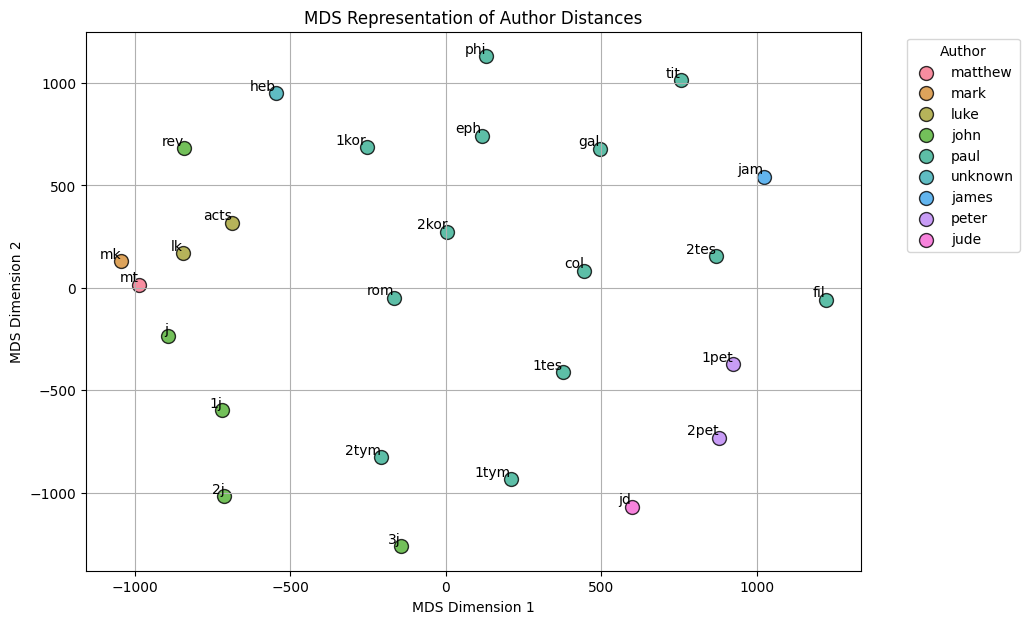

In [8]:
from visualise import show_book_mds_embedding

show_book_mds_embedding(distances)